# Построение спектров aot осредненных по области

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path

## input data

In [220]:
# change these fields
current_date = '08.08.2022'
satellite_label = 'S3A'
BASE_DIR = '/media/data1/laboratory/results/aerosol-2022/'  # mhi
#BASE_DIR = '/media/data/gorky/aerosol-2022/'  # home

In [221]:
# static input fields
data_dir = path.join(BASE_DIR, 'l2gen/results/aot_ac-2')

# formatted date
date_formated = {'31.05.2022': '31 May 2022', '24.06.2022': '24 June 2022',
            '27.07.2022': '27 July 2022', '01.08.2022': '01 August 2022',
            '02.08.2022': '02 August 2022', '08.08.2022': '08 August 2022'}

In [222]:
#c dynamic input fields
day, month, year = current_date.split('.')

# datafile with aot calculated in l2gen by ac=-2
fname_aot_ac2 = f'{satellite_label}_{year}-{month}-{day}_aot_area_ac-2.txt'

# datafile with measured AOT
fname_aot_measured = 'AOT_measured.csv'

fname_aot_ac2 = path.join(data_dir, fname_aot_ac2)
fname_aot_measured = path.join(data_dir, fname_aot_measured)

## Open files, calculate min, mean, max spectra AOT in area

In [223]:
# use columns for AOT
usecolumns = range(16,37)
# names of columns
column_names = [400, 412, 443, 490, 510, 560, 620, 665, 674, 682, 709, 754,
               762, 765, 768, 779, 866, 884, 899, 939, 1013]

In [224]:
aot_ac2 = pd.read_csv(fname_aot_ac2, sep='\t', usecols=usecolumns, header=0, names=column_names)

In [225]:
# drop zeroes aot
aot_ac2 = aot_ac2.loc[aot_ac2.ne(0).all(axis=1)]
aot_ac2 = aot_ac2.dropna(how='all')

In [226]:
aot_ac2.head()

,400,412,443,490,510,560,620,665,674,682,...,754,762,765,768,779,866,884,899,939,1013
0,0.3938,0.3813,0.3504,0.3084,0.2927,0.2580,0.2243,0.2036,0.2000,0.1970,...,0.1709,0.1686,0.1677,0.1668,0.1635,0.1428,0.1394,0.1368,0.1305,0.1212
1,0.4024,0.3886,0.3546,0.3083,0.2910,0.2527,0.2154,0.1924,0.1884,0.1850,...,0.1560,0.1534,0.1524,0.1513,0.1477,0.1245,0.1206,0.1176,0.1105,0.0998
2,0.4095,0.3947,0.3583,0.3089,0.2903,0.2493,0.2092,0.1846,0.1802,0.1766,...,0.1454,0.1426,0.1414,0.1404,0.1364,0.1113,0.1070,0.1038,0.0961,0.0844
3,0.4209,0.4049,0.3655,0.3119,0.2918,0.2473,0.2038,0.1770,0.1723,0.1683,...,0.1343,0.1313,0.1300,0.1288,0.1245,0.0970,0.0923,0.0888,0.0803,0.0673
4,0.4203,0.4068,0.3734,0.3281,0.3111,0.2736,0.2372,0.2148,0.2109,0.2076,...,0.1794,0.1769,0.1759,0.1749,0.1713,0.1490,0.1452,0.1424,0.1356,0.1255


In [227]:
statistics = {'min': aot_ac2.min(),
             'median': aot_ac2.median(),
             'max': aot_ac2.max(),
             'mean': aot_ac2.mean()}

In [228]:
aot_ac2_statistic = pd.DataFrame(statistics)

In [229]:
aot_ac2_statistic.T

,400,412,443,490,510,560,620,665,674,682,...,754,762,765,768,779,866,884,899,939,1013
min,0.336200,0.326800,0.303700,0.272300,0.260300,0.219600,0.179700,0.155100,0.150800,0.147200,...,0.116000,0.113200,0.112100,0.111000,0.10700,0.081700,0.077400,0.074200,0.066400,0.054400
median,0.406850,0.393300,0.360900,0.315900,0.299000,0.263200,0.228350,0.206400,0.202550,0.199450,...,0.173450,0.171250,0.170350,0.169550,0.16660,0.146750,0.143150,0.140400,0.134550,0.125400
max,0.658800,0.633300,0.570500,0.485200,0.453100,0.382200,0.312800,0.270100,0.262500,0.256300,...,0.209500,0.207100,0.206100,0.205200,0.20180,0.181400,0.178600,0.176500,0.171500,0.164100
mean,0.412132,0.398788,0.365922,0.321294,0.304555,0.267657,0.231742,0.209714,0.205837,0.202615,...,0.174865,0.172398,0.171391,0.170424,0.16692,0.144886,0.141169,0.138392,0.131711,0.121702


## Считываем измеренный AOT

In [230]:
aot_measured = pd.read_csv(fname_aot_measured, sep='\t', names=column_names)

In [231]:
aot_measured

,400,412,443,490,510,560,620,665,674,682,...,754,762,765,768,779,866,884,899,939,1013
31.05.2022,0.0770,0.0741,0.0674,0.0591,0.0561,0.0497,0.0436,0.0398,0.0391,0.0385,...,0.0338,0.0333,0.0332,0.0330,0.0324,0.0282,0.0275,0.0269,0.0254,0.0230
24.06.2022,0.0544,0.0521,0.0468,0.0403,0.0380,0.0330,0.0284,0.0256,0.0251,0.0247,...,0.0212,0.0209,0.0208,0.0207,0.0202,0.0173,0.0168,0.0164,0.0153,0.0137
27.07.2022,0.3989,0.3809,0.3400,0.2903,0.2727,0.2355,0.2008,0.1799,0.1762,0.1730,...,0.1478,0.1454,0.1445,0.1436,0.1404,0.1190,0.1152,0.1122,0.1048,0.0931
01.08.2022,0.0664,0.0639,0.0583,0.0513,0.0488,0.0433,0.0380,0.0348,0.0342,0.0337,...,0.0297,0.0293,0.0291,0.0290,0.0285,0.0249,0.0243,0.0237,0.0225,0.0204
02.08.2022,0.0913,0.0884,0.0819,0.0736,0.0706,0.0640,0.0574,0.0533,0.0526,0.0519,...,0.0467,0.0462,0.0460,0.0458,0.0451,0.0404,0.0395,0.0388,0.0370,0.0342
08.08.2022,0.3808,0.3635,0.3245,0.2770,0.2602,0.2247,0.1916,0.1717,0.1681,0.1650,...,0.1410,0.1387,0.1378,0.1370,0.1340,0.1135,0.1099,0.1070,0.1000,0.0888


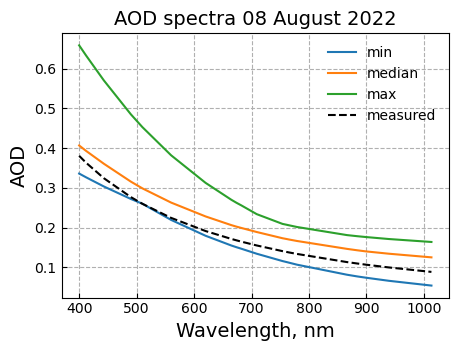

In [232]:
plt.figure(dpi=100, figsize=(5,3.5))
ax = plt.axes()
plt.plot(aot_ac2_statistic['min'], label='min')
plt.plot(aot_ac2_statistic['median'], label='median')
plt.plot(aot_ac2_statistic['max'], label='max')
plt.plot(aot_measured.loc[current_date], label='measured', color='black', linestyle='--')
ax.tick_params(axis='both', direction='in')
plt.ylabel("AOD", fontsize=14)
plt.xlabel("Wavelength, nm", fontsize=14)
ax.grid(True, linestyle='--')
plt.title(f'AOD spectra {date_formated[current_date]}', fontsize=14)
plt.legend(frameon=False)

day, month, year = current_date.split('.')
img_name = path.join(data_dir, f'AOT_{satellite_label}_{year}-{month}-{day}_area_ac-2_2.png')
plt.savefig(img_name, dpi=300, bbox_inches='tight')
plt.show()

## Расчитываем квантили

In [233]:
# quantile calculated
quantiles = [round(i, 2) for i in np.linspace(0.01, 0.1, 10)][1::2]

In [234]:
quantiles_area = aot_ac2.quantile(q=quantiles, axis=0, numeric_only=True, interpolation='linear').T

In [235]:
quantiles_area

,0.02,0.04,0.06,0.08,0.10
400,0.349372,0.353844,0.359086,0.365860,0.36867
412,0.339472,0.343780,0.348740,0.354872,0.35739
443,0.315072,0.318736,0.323240,0.327644,0.32988
490,0.280918,0.283688,0.287832,0.290488,0.29177
510,0.267936,0.270880,0.274108,0.276660,0.27760
560,0.239136,0.241604,0.244478,0.245672,0.24679
620,0.205314,0.209372,0.210954,0.212388,0.21379
665,0.182354,0.184708,0.188470,0.190300,0.19400
674,0.177718,0.180772,0.184254,0.186244,0.19016
682,0.173736,0.177636,0.180670,0.182772,0.18695


In [236]:
# save percentiles in file
ofile = f'AOT-percentile_{satellite_label}_{year}-{month}-{day}_area.csv'
ofile = path.join(data_dir, ofile)
quantiles_area.T.to_csv(ofile, sep='\t')

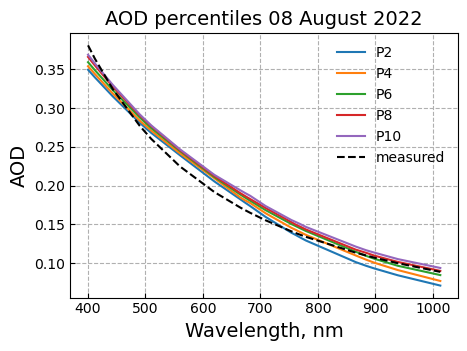

In [237]:
plt.figure(dpi=100, figsize=(5,3.5))
ax = plt.axes()
for col in quantiles_area.columns:
    plt.plot(quantiles_area[col])
plt.plot(aot_measured.loc[current_date], label='measured', color='black', linestyle='--')
ax.tick_params(axis='both', direction='in')
plt.ylabel("AOD", fontsize=14)
plt.xlabel("Wavelength, nm", fontsize=14)
ax.grid(True, linestyle='--')
plt.title(f'AOD percentiles {date_formated[current_date]}', fontsize=14)
labels = ['P2', 'P4', 'P6', 'P8', 'P10', 'measured']
#plt.legend(frameon=False, bbox_to_anchor = (1.05, 1), title='quantile', labels=labels)
plt.legend(frameon=False, labels=labels)

day, month, year = current_date.split('.')
img_name = path.join(data_dir, f'AOT_quantile{satellite_label}_{year}-{month}-{day}_area_ac-2.png')
plt.savefig(img_name, dpi=300, bbox_inches='tight')
plt.show()